## Example 2

> We are going to create a neural network for predicting the closing stock price 

In [1]:
# Charging the necesary libraries
import pandas as pd                             # librarie for handling data
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Charging the data 
df = pd.read_csv('AMZN_data.csv')
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,261.40,265.25,260.555,261.95,3879078,AMZN
1,2013-02-11,263.20,263.25,256.600,257.21,3403403,AMZN
2,2013-02-12,259.19,260.16,257.000,258.70,2938660,AMZN
3,2013-02-13,261.53,269.96,260.300,269.47,5292996,AMZN
4,2013-02-14,267.37,270.65,265.400,269.24,3462780,AMZN


El volumen de negociación `volume` es una métrica importante en el análisis financiero, ya que representa la cantidad de acciones negociadas en un período determinado.

In [3]:
# Data Preprocessing
df = df.sort_values('date')                             # Ordena el DataFrame según los valores de la columna 'date'
df = df.set_index('date')                               # Configura el índice del dataframe con la fecha

In [4]:
df

,open,high,low,close,volume,Name
date,,,,,,
2013-02-08,261.40,265.25,260.555,261.95,3879078,AMZN
2013-02-11,263.20,263.25,256.600,257.21,3403403,AMZN
2013-02-12,259.19,260.16,257.000,258.70,2938660,AMZN
2013-02-13,261.53,269.96,260.300,269.47,5292996,AMZN
2013-02-14,267.37,270.65,265.400,269.24,3462780,AMZN
...,...,...,...,...,...,...
2018-02-01,1445.00,1459.88,1385.140,1390.00,9113808,AMZN
2018-02-02,1477.39,1498.00,1414.000,1429.95,11125722,AMZN
2018-02-05,1402.62,1458.98,1320.720,1390.00,11494985,AMZN


In [5]:
df = df[['open', 'low', 'high', 'volume','close',]]     # We drop the column Name
# df = df.drop[df.columns[-1], axis=1, inplace=True]      # We drop the column Name
df

,open,low,high,volume,close
date,,,,,
2013-02-08,261.40,260.555,265.25,3879078,261.95
2013-02-11,263.20,256.600,263.25,3403403,257.21
2013-02-12,259.19,257.000,260.16,2938660,258.70
2013-02-13,261.53,260.300,269.96,5292996,269.47
2013-02-14,267.37,265.400,270.65,3462780,269.24
...,...,...,...,...,...
2018-02-01,1445.00,1385.140,1459.88,9113808,1390.00
2018-02-02,1477.39,1414.000,1498.00,11125722,1429.95
2018-02-05,1402.62,1320.720,1458.98,11494985,1390.00


In [6]:
# Scaling the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df)

In [7]:
# Segmenting the dataset in training and testing
train_size = int(len(scaled_data) * 0.8)
test_size = len(scaled_data) - train_size
train_data = scaled_data[0:train_size, :]
test_data = scaled_data[train_size:len(scaled_data), :]

In [8]:
# We create a new function that takes 2 arguments and returns the training dataset
def create_dataset(dataset, look_back=1):
    data_X, data_Y = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), :]
        data_X.append(a)
        data_Y.append(dataset[i + look_back, 1])
    return np.array(data_X), np.array(data_Y)

# "look_back" hace referencia al número de pasos de tiempo anteriores que se utilizan como características para predecir el siguiente valor en la secuencia.

# En otras palabras, si estableces el valor de "look_back" en 20, significa que estás utilizando los últimos 20 valores de precios de acciones como características 
# para predecir el siguiente valor de precio. Esto se utiliza para crear conjuntos de datos de entrenamiento en los que cada muestra contiene una secuencia de "look_back"
# valores anteriores y su correspondiente valor objetivo.

# Definir el número de pasos de tiempo para hacer la predicción
look_back = 20

In [9]:
train_data

array([[0.01014286, 0.01229355, 0.00989503, 0.12239586, 0.01140805],
       [0.01160812, 0.00900946, 0.00828869, 0.10149909, 0.00746678],
       [0.00834385, 0.0093416 , 0.0058069 , 0.08108258, 0.0087057 ],
       ...,
       [0.45405185, 0.46355114, 0.45408692, 0.42945852, 0.46727255],
       [0.45655908, 0.46272077, 0.44799891, 0.12319641, 0.46514393],
       [0.4561602 , 0.46645741, 0.45236814, 0.10425303, 0.46918497]])

In [10]:
# Creating the training dataset with the function build previously
train_X, train_Y = create_dataset(train_data, look_back)
test_X, test_Y = create_dataset(test_data, look_back)

In [11]:
train_X.shape[2]

5

In [12]:
# Building the Neural Network Architecture
nuerons_number = 128
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(nuerons_number, input_shape=(look_back, train_X.shape[2])),        # Input layer with the first hidden layer
    # tf.keras.layers.LSTM(nuerons_number),                                                   # Second hidden layer
    # tf.keras.layers.LSTM(nuerons_number),                                                   # Third hidden layer
    tf.keras.layers.Dense(1)                                                                # Output layer
])

# LSTM (Long Short-Term Memory) es un tipo de capa recurrente utilizada en redes neuronales para procesar y modelar secuencias de datos, como series de tiempo.

In [13]:
# Compiling the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Training the model
model.fit(train_X, train_Y, epochs=100, batch_size=32, verbose=2)

Epoch 1/100
31/31 - 2s - loss: 0.0029 - 2s/epoch - 76ms/step
Epoch 2/100
31/31 - 0s - loss: 2.1353e-04 - 431ms/epoch - 14ms/step
Epoch 3/100
31/31 - 0s - loss: 1.5993e-04 - 437ms/epoch - 14ms/step
Epoch 4/100
31/31 - 0s - loss: 1.6793e-04 - 436ms/epoch - 14ms/step
Epoch 5/100
31/31 - 1s - loss: 1.8888e-04 - 578ms/epoch - 19ms/step
Epoch 6/100
31/31 - 0s - loss: 1.6293e-04 - 464ms/epoch - 15ms/step
Epoch 7/100
31/31 - 0s - loss: 1.5131e-04 - 469ms/epoch - 15ms/step
Epoch 8/100
31/31 - 1s - loss: 1.4606e-04 - 599ms/epoch - 19ms/step
Epoch 9/100
31/31 - 1s - loss: 1.3899e-04 - 503ms/epoch - 16ms/step
Epoch 10/100
31/31 - 0s - loss: 1.3038e-04 - 437ms/epoch - 14ms/step
Epoch 11/100
31/31 - 0s - loss: 1.2714e-04 - 433ms/epoch - 14ms/step
Epoch 12/100
31/31 - 0s - loss: 1.2299e-04 - 436ms/epoch - 14ms/step
Epoch 13/100
31/31 - 0s - loss: 1.2360e-04 - 438ms/epoch - 14ms/step
Epoch 14/100
31/31 - 0s - loss: 1.1957e-04 - 443ms/epoch - 14ms/step
Epoch 15/100
31/31 - 0s - loss: 1.1922e-04 - 475ms

In [14]:
# Evaluating the model
train_loss = model.evaluate(train_X, train_Y, verbose=0)
print(f'Training error: {train_loss}')
test_loss = model.evaluate(test_X, test_Y, verbose=2)
print('Testing error: ' + str({test_loss}))

Training error: 5.171890006749891e-05
8/8 - 0s - loss: 1.7686e-04 - 69ms/epoch - 9ms/step
Testing error: {0.00017686108185444027}


8/8 [==============================] - 0s 8ms/step


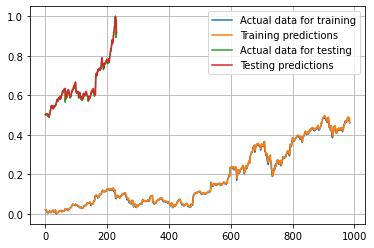

In [15]:
# Making predictions
train_predictions = model.predict(train_X)
test_predictions = model.predict(test_X)

# plotting predictions
plt.plot(train_Y.flatten(), label='Actual data for training')
plt.plot(train_predictions.flatten(), label='Training predictions')
plt.plot(test_Y.flatten(), label='Actual data for testing')
plt.plot(test_predictions.flatten(), label='Testing predictions')
plt.legend()
plt.grid()
plt.savefig('Comparison.pdf');

En el código proporcionado, la variable objetivo se llama `data_Y.` Se crea en la función `create_dataset()` y contiene los valores objetivo correspondientes a cada conjunto de características en `data_X`.

En la función `create_dataset()`, se toma el conjunto de datos `dataset` y se crea una ventana deslizante de tamaño `look_back` para crear los conjuntos de características y objetivo. En cada iteración, se toma un conjunto de `look_back` valores anteriores como características (`data_X`) y el siguiente valor después de esa ventana como el valor objetivo (`data_Y`).

Por lo tanto, en este caso, la variable objetivo es `data_Y`, que representa los valores objetivo correspondientes a cada conjunto de características `data_X`.